In [1]:
import numpy as np
import cv2
import glob
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimensions: (738, 1280, 3) uint8
(738, 1280, 3)


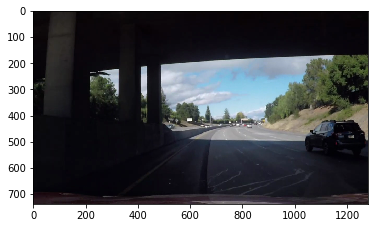

In [2]:
#reading in an image
image = (mpimg.imread('error_images/error3.png')*255).astype(np.uint8)

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape, image.dtype)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
print(image.shape)

In [3]:
def equalizeIntensity(img):
    if(img.shape[2] >= 3):
        ycrcb = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb);
        
        channels = cv2.split(ycrcb)
        clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
        channels[0] = clahe.apply(channels[0])
        
        ycrcb = cv2.merge(channels);

        result = cv2.cvtColor(ycrcb,cv2.COLOR_YCrCb2BGR);

        return result;
    return img

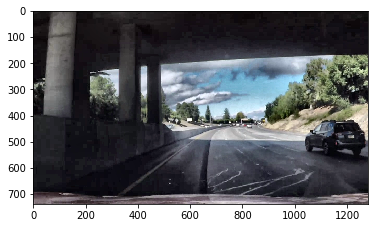

In [4]:
image_b = equalizeIntensity(image)

plt.imshow(image_b)

In [5]:
def lab_equal(img):
    if(img.shape[2] >= 3):
        ycrcb = cv2.cvtColor(img,cv2.COLOR_BGR2LAB);
        
        channels = cv2.split(ycrcb)
        clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
        channels[0] = clahe.apply(channels[0])

        ycrcb = cv2.merge(channels);
        result = cv2.cvtColor(ycrcb,cv2.COLOR_LAB2BGR);

        return result;
    return img

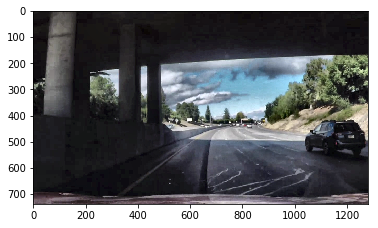

In [6]:
image_c = lab_equal(image)

plt.imshow(image_c)

In [7]:
def lab_b_channel2(img):
    if(img.shape[2] >= 3):
        ycrcb = cv2.cvtColor(img,cv2.COLOR_BGR2LAB);
        
        
        channels = cv2.split(ycrcb)
        result =  channels[2]
    return result

In [8]:
def lab_b_channel(img):
    if(img.shape[2] >= 3):
        ycrcb = cv2.cvtColor(img,cv2.COLOR_BGR2LAB);
        
        channels = cv2.split(ycrcb)
        clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
        channels[2] = clahe.apply(channels[2])
        
        result =  np.zeros_like(channels[2])
        #print(channels[2])
        result[channels[2] < 110] = 1
    return result

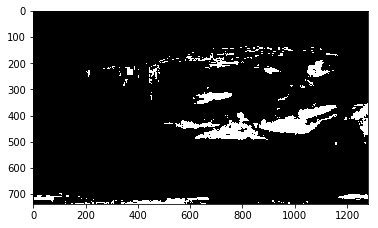

In [9]:
image_ca = lab_b_channel(image_c)

plt.imshow(image_ca, cmap='gray')

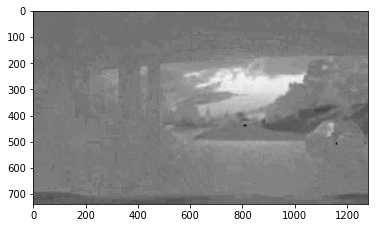

In [10]:
image_cb = lab_b_channel2(image_c)

plt.imshow(image_cb, cmap='gray')

In [11]:
def hls_s_channel(img):
    if(img.shape[2] >= 3):
        hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        
        channels = cv2.split(hls)
        clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
        #channels[2] = clahe.apply(channels[2])
        
        result =  np.zeros_like(channels[2])
        #print(channels[2])
        result[(channels[2] > 170) & (channels[2] <= 255)] = 1
    return result

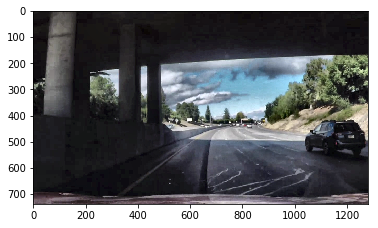

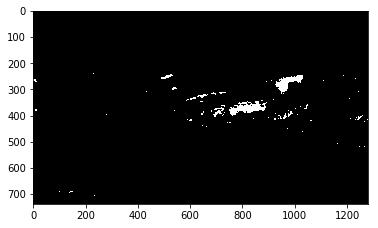

In [12]:
image_d = hls_s_channel(image_c)
plt.figure()
plt.imshow(image_c)
plt.figure()
plt.imshow(image_d, cmap='gray')

In [13]:
def removeNonYellowAndWhite(img):
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([75,60,60])
    upper_yellow = np.array([115,255,255])
    lower_white = np.array([0,0,215], dtype=np.uint8)
    upper_white = np.array([180,40,255], dtype=np.uint8)
    
    kernel = np.ones((20,20), np.uint8)

    # Threshold the HSV image to get only yellow colors
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_white = cv2.inRange(hsv, lower_white, upper_white)
    
    mask = cv2.bitwise_or(mask_yellow, mask_white)
    mask = cv2.dilate(mask, kernel, iterations=1)
    
    res = cv2.bitwise_and(img, img, mask= mask)
    
    return res

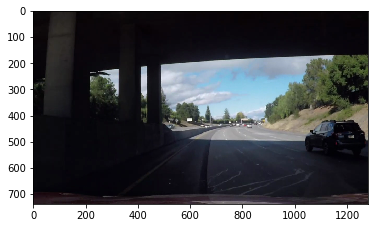

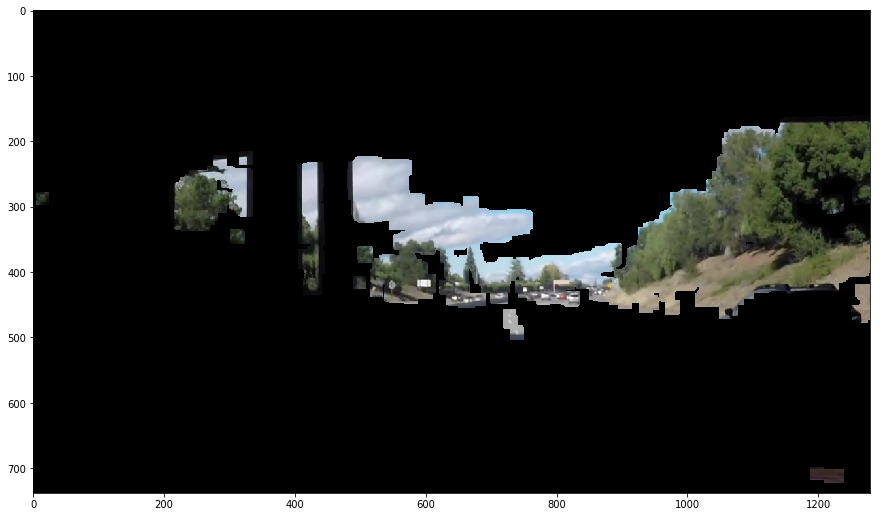

In [14]:
image_e = removeNonYellowAndWhite(image)
plt.figure()
plt.imshow(image)
plt.figure(figsize=(15,15))
plt.imshow(image_e)

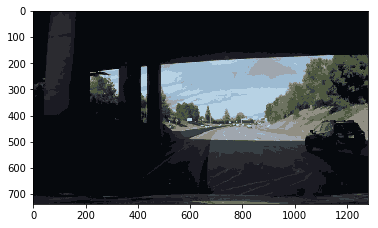

In [15]:
import numpy as np
import cv2
 
img = cv2.imread('error_images/error3.png')
#img = mpimg.imread('error_images/error.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2LAB);
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 10
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

res2 = cv2.cvtColor(res2,cv2.COLOR_LAB2RGB);

plt.imshow(res2)

uint8


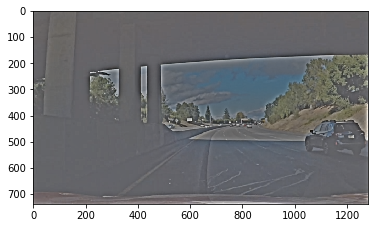

In [16]:
inputImage = mpimg.imread('error_images/error3.png')
retina = cv2.bioinspired.createRetina((inputImage.shape[1], inputImage.shape[0]))

for i in range(5): 
    retina.run(inputImage)
    
retinaOut_parvo = retina.getParvo()
retina.setup('error_images/MyRetinaParameters.xml')

#retinaOut_parvo = retinaOut_parvo * 255
#retinaOut_parvo = retinaOut_parvo.astype(np.uint8)

plt.imshow(inputImage)
plt.imshow(retinaOut_parvo)

print(retinaOut_parvo.dtype)

plt.imsave('error_images/error_test.jpg', retinaOut_parvo)

In [17]:
import timeit

kernel_15 = cv2.getGaussianKernel(6*15+1, 15)
kernel_80 = cv2.getGaussianKernel(6*80+1, 80)
kernel_250 = cv2.getGaussianKernel(6*250+1, 250)


def approx_g(image, sigma_g, n=5):
    w = np.sqrt(12*sigma_g**2/n + 1)
    wu = np.ceil(w) if np.ceil(w) % 2 == 1 else np.ceil(w)+1
    wl = np.floor(w) if np.floor(w) % 2 == 1 else np.floor(w)-1
    if w == w//1:
        wl -= 2
        wu += 2
    m = round((12*sigma_g**2 - n*wl**2 - 4*n*wl - 3*n) / (-4*wl - 4))
    wl = int(wl)
    wu = int(wu)
    for num in range(0,int(m)):
        image = cv2.blur(image, (wl, wl))
    for num in range(0,int(n-m)):
        image = cv2.blur(image, (wu, wu))
    return image

def GaussianBlur(img, sigma):
    output = np.copy(img)
    if(sigma == 15):
        kernel = kernel_15
    elif (sigma == 80):
        kernel = kernel_80
    elif (sigma == 250):
        kernel = kernel_250
        
    kernel = cv2.flip(kernel, -1)
    
    for i in range(3):
        output[:,:,i] = cv2.sepFilter2D(output[:,:,i], -1, kernel, kernel);
    return output

def singleScaleRetinex(img, sigma):
    start = timeit.default_timer()
    
    #retinex = np.log10(img) - np.log10(GaussianBlur(img, sigma))
    retinex = np.log10(img) - np.log10(approx_g(img, sigma))
    stop = timeit.default_timer()
    print('singleScaleRetinex', stop - start, img.shape )
    
    return retinex

def singleScaleRetinexB(img, sigma):
    start = timeit.default_timer()
    
    retinex = np.log10(img) - np.log10(cv2.GaussianBlur(img, (0, 0), sigma))
    stop = timeit.default_timer()
    print('singleScaleRetinex', stop - start, img.shape )
    
    return retinex

def multiScaleRetinex(img, sigma_list):

    retinex = np.zeros_like(img)
    for sigma in sigma_list:
        retinex += singleScaleRetinex(img, sigma)

    retinex = retinex / len(sigma_list)

    return retinex

def automatedMSRCR(img, sigma_list):

    img = np.float64(img) + 1.0

    start = timeit.default_timer()
    
    img_retinex = multiScaleRetinex(img, sigma_list)
    
    stop = timeit.default_timer()
    print(stop - start )

    start = timeit.default_timer()
    
    for i in range(img_retinex.shape[2]):
        unique, count = np.unique(np.int32(img_retinex[:, :, i] * 100), return_counts=True)
        for u, c in zip(unique, count):
            if u == 0:
                zero_count = c
                break
            
        low_val = unique[0] / 100.0
        high_val = unique[-1] / 100.0
        for u, c in zip(unique, count):
            if u < 0 and c < zero_count * 0.1:
                low_val = u / 100.0
            if u > 0 and c < zero_count * 0.1:
                high_val = u / 100.0
                break
            
        img_retinex[:, :, i] = np.maximum(np.minimum(img_retinex[:, :, i], high_val), low_val)
        
        img_retinex[:, :, i] = (img_retinex[:, :, i] - np.min(img_retinex[:, :, i])) / \
                               (np.max(img_retinex[:, :, i]) - np.min(img_retinex[:, :, i])) \
                               * 255
    
    stop = timeit.default_timer()
    print(stop - start )
    
    img_retinex = np.uint8(img_retinex)
        
    return img_retinex

singleScaleRetinex 0.14854278492199285 (720, 1280, 3)
singleScaleRetinex 0.14844628061219103 (720, 1280, 3)
singleScaleRetinex 0.17525151629681618 (720, 1280, 3)
0.5061806200727723
0.15495271909426211


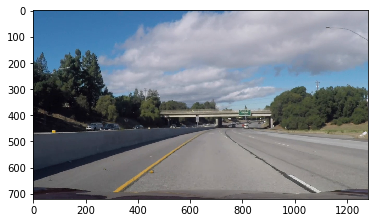

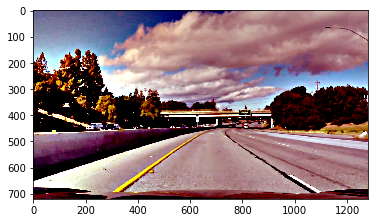

In [18]:
import json

f = \
'''
{
    "sigma_list": [15, 80, 250],
    "G"         : 5.0,
    "b"         : 25.0,
    "alpha"     : 125.0,
    "beta"      : 46.0,
    "low_clip"  : 0.01,
    "high_clip" : 0.99
}
'''

config = json.loads(f)

inputImage = cv2.imread('error_images/error.jpg')

img_amsrcr = automatedMSRCR(
        inputImage,
        [15, 80, 250]
    )
plt.figure()
plt.imshow(cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB) )
plt.figure()
img_amsrcr = cv2.cvtColor(img_amsrcr, cv2.COLOR_BGR2RGB)
plt.imshow( img_amsrcr)

plt.imsave('error_images/error_test.jpg', img_amsrcr)

singleScaleRetinex 0.14961736506618473 (738, 1280, 3)
singleScaleRetinex 0.15387007106564976 (738, 1280, 3)
singleScaleRetinex 0.1861174050953036 (738, 1280, 3)
0.5232113034784371
0.1645798773309206
Wall time: 709 ms


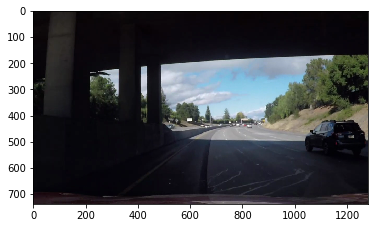

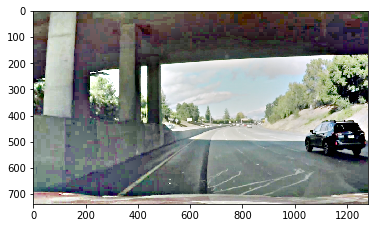

In [19]:
import json

f = \
'''
{
    "sigma_list": [15, 80, 250],
    "G"         : 5.0,
    "b"         : 25.0,
    "alpha"     : 125.0,
    "beta"      : 46.0,
    "low_clip"  : 0.01,
    "high_clip" : 0.99
}
'''

config = json.loads(f)

inputImage = cv2.imread('error_images/error3.png')

%time img_amsrcr = automatedMSRCR(inputImage,[15, 80, 250])
plt.figure()
plt.imshow(cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB) )
plt.figure()
img_amsrcr = cv2.cvtColor(img_amsrcr, cv2.COLOR_BGR2RGB)
plt.imshow( img_amsrcr)

#plt.imsave('test_images/error_test.jpg', img_amsrcr)

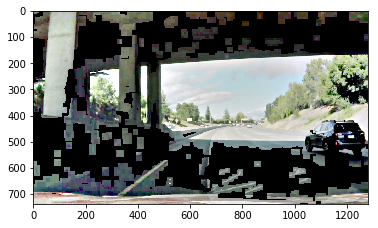

In [20]:
def removeNonYellowAndWhite(img):
    
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    lower_yellow = np.array([20,60,60])
    upper_yellow = np.array([100,255,255])
    lower_white = np.array([0,0,195], dtype=np.uint8)
    upper_white = np.array([180,60,255], dtype=np.uint8)
    
    kernel = np.ones((20,20), np.uint8)

    # Threshold the HSV image to get only yellow colors
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_white = cv2.inRange(hsv, lower_white, upper_white)
    
    mask = cv2.bitwise_or(mask_yellow, mask_white)
    mask = cv2.dilate(mask, kernel, iterations=1)
    
    res = cv2.bitwise_and(img, img, mask= mask)
    
    return res

img_f = removeNonYellowAndWhite(img_amsrcr)
plt.imshow( img_f)

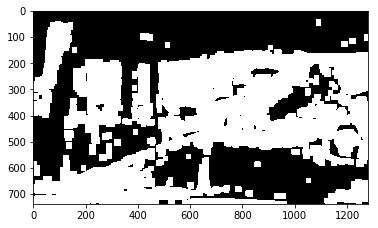

In [21]:
def yellow_and_white_mask(img):
    
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    lower_yellow = np.array([75,60,60])
    upper_yellow = np.array([115,255,255])
    lower_white = np.array([0,0,215], dtype=np.uint8)
    upper_white = np.array([180,40,255], dtype=np.uint8)
    
    kernel = np.ones((20,20), np.uint8)

    # Threshold the HSV image to get only yellow colors
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_white = cv2.inRange(hsv, lower_white, upper_white)
    
    mask = cv2.bitwise_or(mask_yellow, mask_white)
    mask = cv2.dilate(mask, kernel, iterations=1)
    
    return mask

img_m = yellow_and_white_mask(img_amsrcr)
plt.imshow( img_m, cmap='gray')

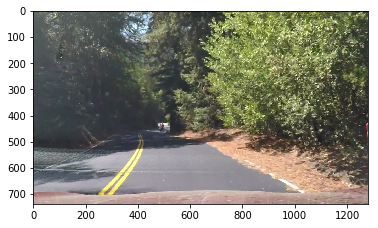

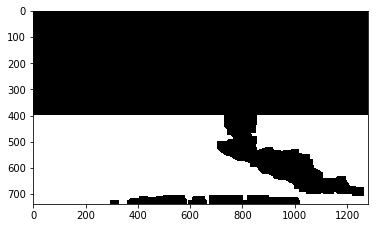

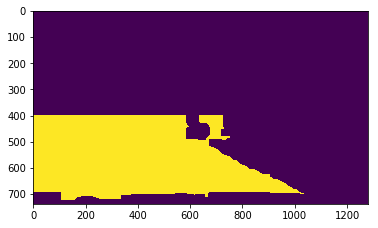

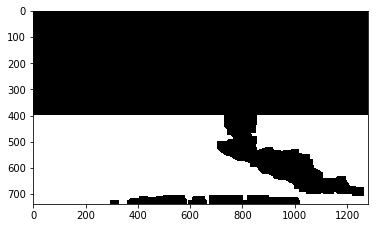

In [22]:
import scipy.ndimage

def gray_road_detector(img, diff = 15, kernel_size=10, max_intensity=235):
    yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    h,w = img.shape[:-1]
    #seed = (w//2,h//8*7)
    seed = (h//8*7,w//2)
    sample_cr = yuv[seed[0]][seed[1]][1]
    sample_cb = yuv[seed[0]][seed[1]][2]

    kernel = np.ones((kernel_size,kernel_size), np.uint8)
    
    lower_limit = np.array([0, sample_cr-diff, sample_cb-diff])
    upper_limit = np.array([255, sample_cr+diff, sample_cb+diff])
    
    mask = cv2.inRange(yuv, lower_limit, upper_limit)
    mask = cv2.dilate(mask, kernel, iterations=1)
    mask = cv2.erode(mask, kernel, iterations=1)
    mask[mask > 0] = 255
    result = mask

    mask = np.zeros((h+2,w+2),np.uint8)
    mask[400,:] = 1

    floodflags = 4
    floodflags |= cv2.FLOODFILL_MASK_ONLY
    floodflags |= (255 << 8)

    num,im,mask,rect = cv2.floodFill(result, mask, seed, 255, 0, 0, floodflags)
    mask = scipy.ndimage.binary_fill_holes(mask[1:-1,1:-1], structure=np.ones((5,5))).astype(np.uint8)
    
    mask[(mask > 0)] = 1
    mask[yuv[:,:,0] > max_intensity]= 0
    
    mask = cv2.dilate(mask, kernel, iterations=1)
    mask = cv2.erode(mask, kernel, iterations=1)
    
    mask[(mask > 0)] = 1
    return mask

#inputImage = cv2.imread('test_images/test6.jpg')
inputImage = cv2.imread('error_images/road_side.png')
#inputImage = cv2.imread('error_images/error.jpg')
inputImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB)
img_mg = gray_road_detector(inputImage, 15, 30, 220)
plt.figure()
plt.imshow( inputImage)
plt.figure()
plt.imshow( img_mg, cmap='gray')


inputImage = gray_road_detector(inputImage, 10, 27, 200)
plt.figure()
plt.imshow( inputImage)
plt.figure()
plt.imshow( img_mg, cmap='gray')

In [23]:
inputImage.shape[:-1]

(738,)

In [24]:
# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    # 3) Take the absolute value of the derivative or gradient
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    # 6) Return this mask as your binary_output image
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    return binary_output

# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    # 2) Apply a threshold to the S channel
    # 3) Return a binary image of threshold result
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1

    return binary_output

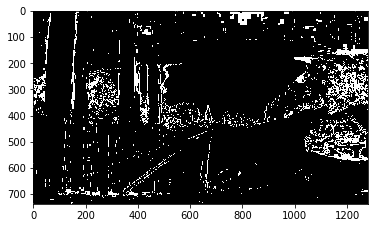

In [25]:
sxbinary = abs_sobel_thresh(img_amsrcr, 'x', 20, 100) #[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
s_binary = hls_select(img_amsrcr, (170, 255)) #[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

# Combine the two binary thresholds
combined_binary = np.zeros_like(s_binary)
#combined_binary[(img_m == 255) & ((s_binary == 1) | (sxbinary == 1))] = 1
combined_binary[ ((s_binary == 1) | (sxbinary == 1))] = 1

plt.imshow( combined_binary, cmap='gray')

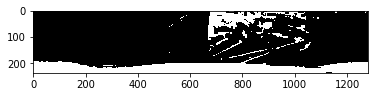

In [26]:
gray_img_amsrcr = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY);
blur = cv2.GaussianBlur(gray_img_amsrcr[500:],(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#th3 = cv2.adaptiveThreshold(gray_img_amsrcr[500:],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

plt.imshow( th3, cmap='gray')


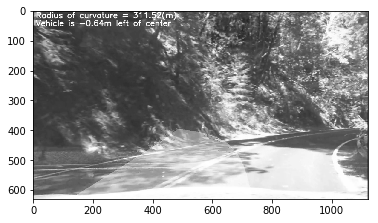

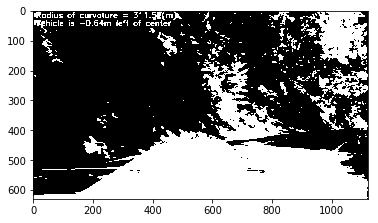

In [27]:
#inputImage = cv2.imread('test_images/test6.jpg')
inputImage = cv2.imread('error_images/error6.png')
inputImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(inputImage,(5,5),0)
#ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_OTSU)
plt.figure()
plt.imshow( inputImage, cmap='gray')
plt.figure()
plt.imshow( th3, cmap='gray')

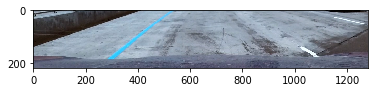

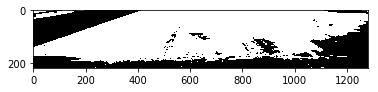

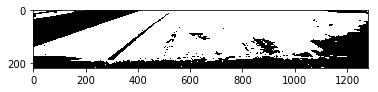

In [28]:
def white_color(img, level, ostu=None, lower_level=180, dilate=1):
    kernel = np.ones((dilate, dilate), np.uint8)

    normal_mask = cv2.inRange(img, (level, level, level), (255, 255, 255))
    lower_mask = cv2.inRange(img, (lower_level, lower_level, lower_level), (255, 255, 255))
    mask = np.zeros_like(normal_mask)
    mask[(normal_mask > 0) | ((lower_mask > 0) & (ostu > 0))] = 1

    mask = cv2.dilate(mask, kernel, iterations=1)
    return mask

inputImage = cv2.imread('test_images/test1.jpg')
inputImage = inputImage[500:,]
inputImage_b = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(inputImage_b,(5,5),0)
#ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_OTSU)

mask_w = white_color(inputImage, 230, th3, 100)

plt.figure()
plt.imshow( inputImage, cmap='gray')
plt.figure()
plt.imshow( th3, cmap='gray')
plt.figure()
plt.imshow( mask_w, cmap='gray')

## Adjusing gamma

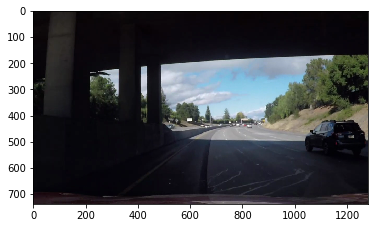

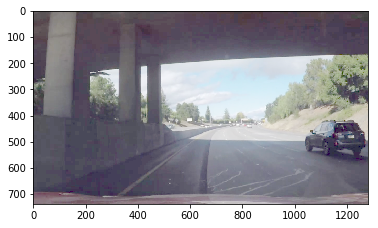

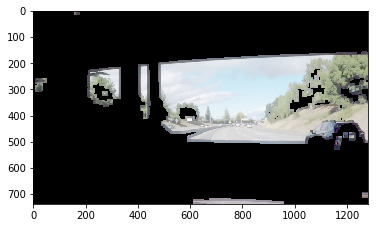

In [29]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
 
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

inputImage = cv2.imread('error_images/error3.png')
inputImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB)
outputImage = adjust_gamma(inputImage, 3)
plt.figure()
plt.imshow( inputImage)
plt.figure()
plt.imshow( outputImage)

outputImage = removeNonYellowAndWhite(outputImage)
plt.figure()
plt.imshow(outputImage)



### Create histogram of a masked road

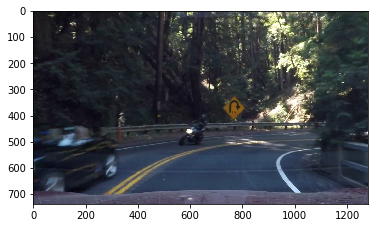

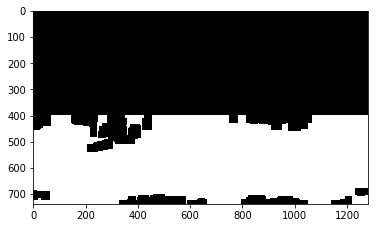

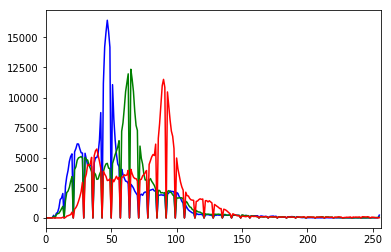

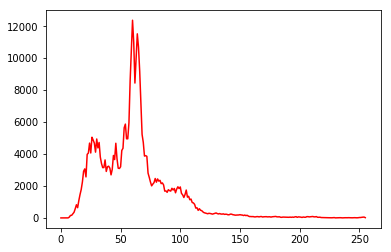

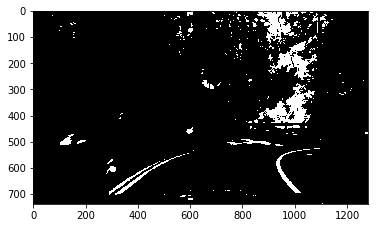

In [30]:
#inputImage = cv2.imread('test_images/test6.jpg')
inputImage = cv2.imread('error_images/error_7.png')
#inputImage = cv2.imread('error_images/error.jpg')
inputImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB)
img_mg = gray_road_detector(inputImage, 10, 27, 220)
plt.figure()
plt.imshow( inputImage)
plt.figure()
plt.imshow( img_mg, cmap='gray')

#rgb histogram
plt.figure()
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([inputImage],[i],img_mg,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

#gray histogram
gray_inputImage =cv2.cvtColor(inputImage, cv2.COLOR_RGB2GRAY) 
histr = cv2.calcHist([gray_inputImage],[0],img_mg,[256],[0,256])
plt.plot(histr,color = col)
plt.show()

mask=np.zeros_like(gray_inputImage)
mask[gray_inputImage > 120] = 1
plt.imshow(mask,cmap = 'gray')

## Effect on histogram of CLAHE

## Histogram quantile threshold vs hard threshold

In [31]:
import math

def percentile(data, percentile):
    size = len(data)
    return sorted(data)[int(math.ceil((size * percentile) / 100)) - 1]

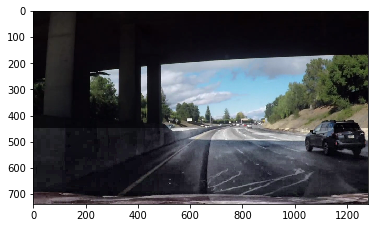

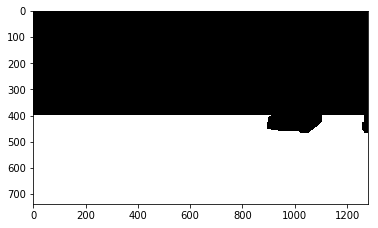

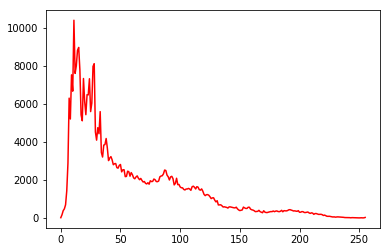

Threshold is  143


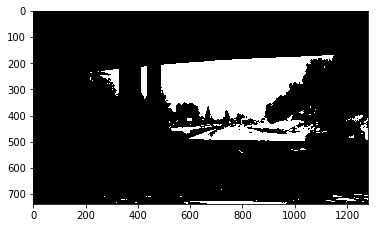

In [32]:
#inputImage = cv2.imread('test_images/test6.jpg')
inputImage = cv2.imread('error_images/error3.png')
#inputImage = cv2.imread('error_images/error.jpg')
inputImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB)
inputImage_bottom = equalizeIntensity(inputImage[450:, :, :])
inputImage[450:, :, :] = inputImage_bottom
img_mg = gray_road_detector(inputImage, 10, 27, 220)
plt.figure()
plt.imshow( inputImage)
plt.figure()
plt.imshow( img_mg, cmap='gray')

#gray histogram
plt.figure()
gray_inputImage =cv2.cvtColor(inputImage, cv2.COLOR_RGB2GRAY) 
histr = cv2.calcHist([gray_inputImage],[0],img_mg,[256],[0,256])
plt.plot(histr,color = col)
plt.show()

mg_nz = img_mg.nonzero()
gray_inputImage_i = gray_inputImage[mg_nz].ravel().copy()
gray_inputImage_i.sort()
threshold = percentile(gray_inputImage_i, 93)
print("Threshold is ", threshold)
mask=np.zeros_like(gray_inputImage)
mask[gray_inputImage > threshold] = 1
plt.imshow(mask,cmap = 'gray')

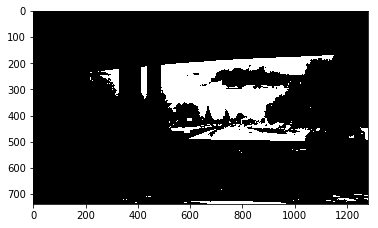

In [33]:
def white_color(img, level = 235, dilate=1):
    kernel = np.ones((dilate,dilate), np.uint8)
    
    lower_white = np.array([level, level, level], dtype=np.uint8)
    upper_white = np.array([255, 255, 255], dtype=np.uint8)
    
    mask = cv2.inRange(img, lower_white, upper_white)
    mask = cv2.dilate(mask, kernel, iterations=1)
    mask[mask > 0] = 1
    
    return mask

white_mask = white_color(inputImage, threshold)
plt.figure()
plt.imshow(white_mask,cmap = 'gray')

### Canny and Sobel edge detection

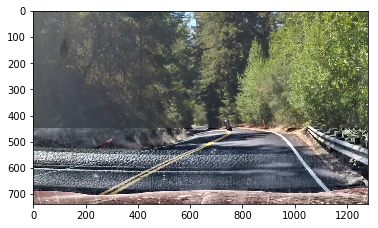

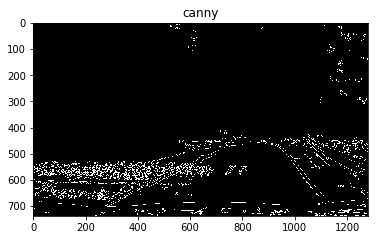

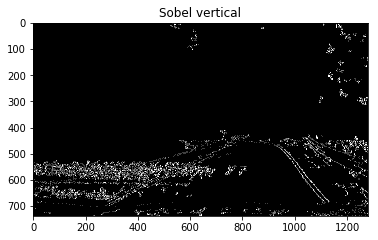

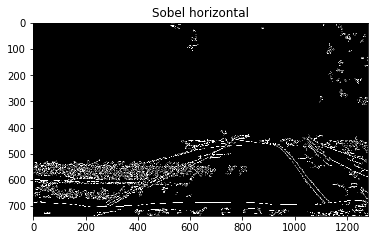

In [34]:
def adoptive_canny(img, threshold):
    ret,thresh1 = cv2.threshold(img , 0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU);
    cannyThresh = threshold * ret;
    return cv2.Canny(img,cannyThresh,ret);

#inputImage = cv2.imread('test_images/test6.jpg')
#inputImage = cv2.imread('error_images/road_side.png')
#inputImage = cv2.imread('error_images/error.jpg')
inputImage = cv2.imread('error_images/reflection_window.png')
inputImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB)
inputImage_bottom = equalizeIntensity(inputImage[450:, :, :])
inputImage[450:, :, :] = inputImage_bottom
inputImage_g = cv2.cvtColor(inputImage, cv2.COLOR_RGB2GRAY)

import skimage.filters

img_canny = adoptive_canny(cv2.cvtColor(inputImage, cv2.COLOR_RGB2GRAY), 5)
plt.figure()
plt.imshow( inputImage)
plt.figure()
plt.title("canny")
plt.imshow( img_canny, cmap='gray')

img_hor = skimage.filters.sobel_v(img_canny)
img_hor = np.abs(img_hor) * 255 
img_hor2 = np.zeros_like(img_hor)
img_hor2[(img_hor > 50) & (img_hor <100)] = 255
plt.figure()
plt.title("Sobel vertical")
plt.imshow( img_hor, cmap='gray')

img_ver = skimage.filters.sobel_h(img_canny)
img_ver = np.abs(img_ver) * 255 
plt.figure()
plt.title("Sobel horizontal")
plt.imshow( img_ver, cmap='gray')

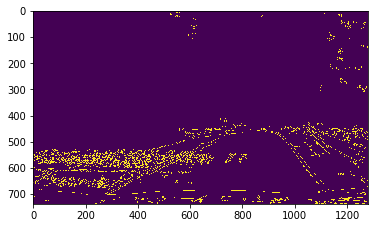

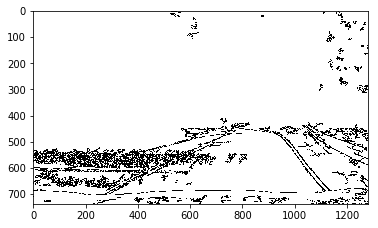

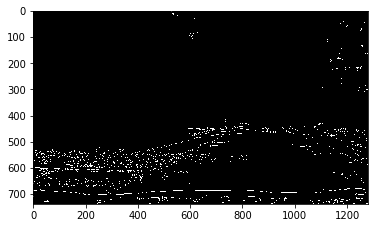

In [35]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the gradient in x and y separately
    # 3) Take the absolute value of the x and y gradients
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    # 5) Create a binary mask where direction thresholds are met
    # 6) Return this mask as your binary_output image
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = img
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    sobelx = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    sobely = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    mag_sobel = np.arctan2(sobely, sobelx)
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(mag_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(mag_sobel >= thresh[0]) & (mag_sobel <= thresh[1])] = 1

    return binary_output

inputImage = cv2.imread('error_images/error3.png')
#inputImage = cv2.imread('error_images/error.jpg')
inputImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB)
inputImage_bottom = equalizeIntensity(inputImage[450:, :, :])
inputImage[450:, :, :] = inputImage_bottom
inputImage_g = cv2.cvtColor(inputImage, cv2.COLOR_RGB2GRAY)


#img_dir = dir_threshold(inputImage, 3, (0.9*np.pi/2, np.pi/2))
img_dir = dir_threshold(img_canny, 3, (0, 0.0005))
plt.figure()
plt.imshow( img_canny)
plt.figure()
plt.imshow( img_dir, cmap='gray')

img_dir = dir_threshold(img_canny, 3, (0.9*np.pi/2, np.pi/2))
plt.figure()
plt.imshow( img_dir, cmap='gray')

### Opening and closing

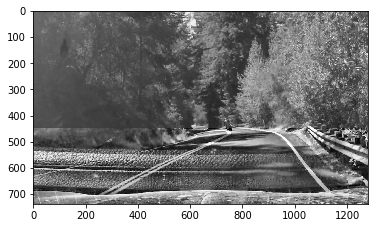

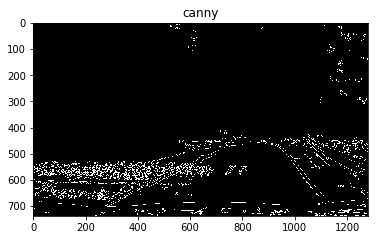

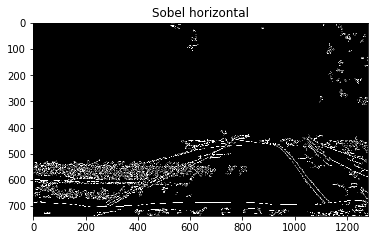

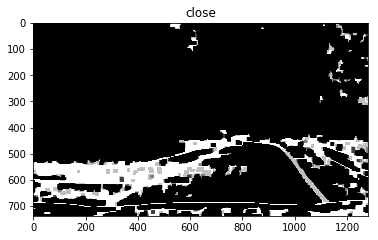

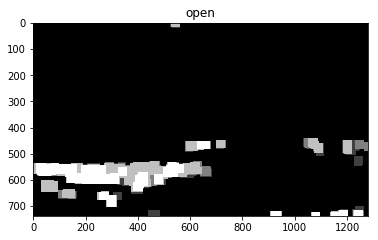

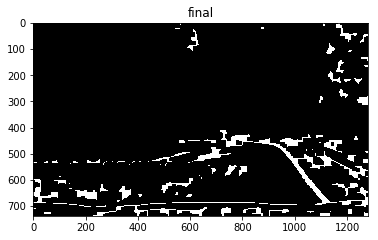

In [36]:
#inputImage = cv2.imread('error_images/error3.png')
#inputImage = cv2.imread('test_images/test6.jpg')
#inputImage = cv2.imread('error_images/road_side.png')
#inputImage = cv2.imread('error_images/error.jpg')
inputImage = cv2.imread('error_images/reflection_window.png')
inputImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB)
inputImage_bottom = equalizeIntensity(inputImage[450:, :, :])
inputImage[450:, :, :] = inputImage_bottom
inputImage_g = cv2.cvtColor(inputImage, cv2.COLOR_RGB2GRAY)

import skimage.filters

img_canny = adoptive_canny(cv2.cvtColor(inputImage, cv2.COLOR_RGB2GRAY), 5)
plt.figure()
#plt.imshow( inputImage)
plt.imshow(cv2.cvtColor(inputImage, cv2.COLOR_RGB2GRAY), cmap='gray')
plt.figure()
plt.title("canny")
plt.imshow( img_canny, cmap='gray')

img_ver = skimage.filters.sobel_h(img_canny)
img_ver = np.abs(img_ver) * 255 
plt.figure()
plt.title("Sobel horizontal")
plt.imshow( img_ver, cmap='gray')

img_canny_test = np.copy(img_ver)
ckernel = np.ones((13,13),np.uint8)
okernel = np.ones((30,30),np.uint8)
img_close = cv2.morphologyEx(img_canny_test, cv2.MORPH_CLOSE, ckernel)
img_open = cv2.morphologyEx(img_close, cv2.MORPH_OPEN, okernel)

final = np.zeros_like(img_close)
final[(img_close > 0) & (img_open==0)]=1

plt.figure()
plt.title("close")
plt.imshow( img_close, cmap='gray')
plt.figure()
plt.title("open")
plt.imshow( img_open, cmap='gray')
plt.figure()
plt.title("final")
plt.imshow( final, cmap='gray')

## HSV study

abc 83 163


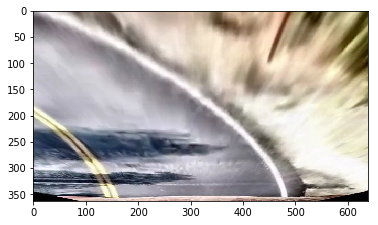

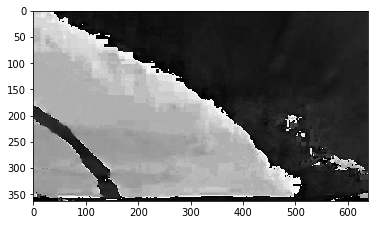

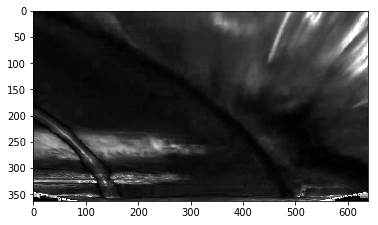

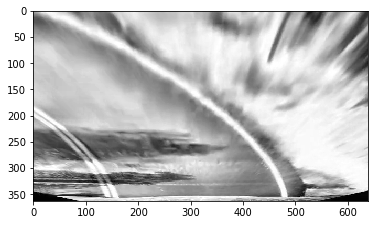

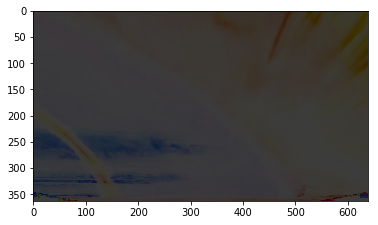

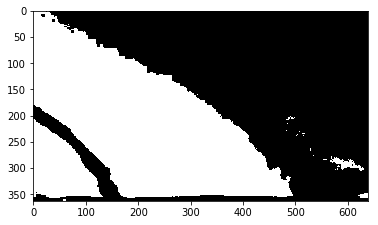

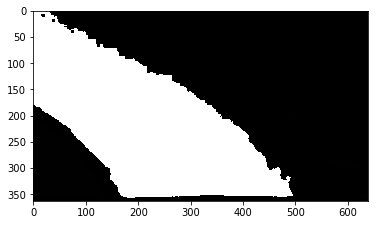

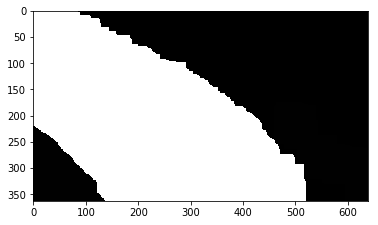

In [37]:
inputImage = cv2.imread('error_images/floodfill_error3.png')
inputImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB)
inputImage_g = cv2.cvtColor(inputImage, cv2.COLOR_RGB2HSV)


plt.figure()
plt.imshow(inputImage)
plt.figure()
plt.imshow(inputImage_g[:,:,0], cmap='gray')
plt.figure()
plt.imshow(inputImage_g[:,:,1], cmap='gray')
plt.figure()
plt.imshow(inputImage_g[:,:,2], cmap='gray')

inputImage_g2 = np.copy(inputImage_g)
inputImage_g2[:,:,2] = 60
inputImage_g2x = cv2.cvtColor(inputImage_g2, cv2.COLOR_HSV2RGB)
plt.figure()
plt.imshow(inputImage_g2x, cmap='gray')


floodflags = 4
#floodflags |= cv2.FLOODFILL_MASK_ONLY
#floodflags |= (255 << 8)

h,w = inputImage_g[:,:,0].shape
img_x = np.zeros_like(inputImage_g[:,:,0])#.reshape(h,w,1)
seed = (300,300)
base_color = inputImage_g[300,300,0]
min_th, max_th = max(0, base_color-40),  min(255, base_color+40)
print('abc', min_th, max_th)
img_x[(inputImage_g[:,:,0] >= min_th) & (inputImage_g[:,:,0] <= max_th)] = 1
mask = np.zeros((h+2,w+2),np.uint8) 
mask[0,:] = 1
mask[:,0] = 1
mask[h+1, :] = 1
mask[:, w+1] = 1

#a, road, b, c = cv2.floodFill(img_x, mask, (0, 0), 255)
plt.figure()
plt.imshow(img_x, cmap='gray')
num,im,mask,rect = cv2.floodFill(img_x, mask, seed, 255, 0, 0, floodflags)
plt.figure()
plt.imshow(im, cmap='gray')

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 50))
im = cv2.dilate(im, kernel, iterations=1)
plt.figure()
plt.imshow(im, cmap='gray')

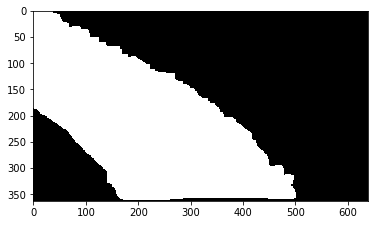

In [38]:
def __gray_road_detector(image_yuv, road_start_px, road_color_diff, \
                         road_closing_size, road_dilate_size):
    hsl = cv2.cvtColor(cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB), cv2.COLOR_RGB2HLS)
    h,w = hsl.shape[:-1]
    seed = (w//2,h*7//8)
    seed2 = (w//2,h*5//8)
    img_x = np.zeros_like(hsl[:,:,0])
    base_color = hsl[seed[0],seed[1],0]
    base_color2 = hsl[seed2[0],seed2[1],0]
    min_th, max_th = max(0, base_color-road_color_diff),  min(255, base_color+road_color_diff)
    min_th2, max_th2 = max(0, base_color2-road_color_diff),  min(255, base_color2+road_color_diff)
    img_x[(hsl[:,:,0] >= min_th) & (hsl[:,:,0] <= max_th)] = 1
    img_x[(hsl[:,:,0] >= min_th2) & (hsl[:,:,0] <= max_th2)] = 1
    mask = np.zeros((h+2,w+2),np.uint8)
    mask[0,:] = 1
    mask[:,0] = 1
    mask[h+1, :] = 1
    mask[:, w+1] = 1

    floodflags = 4
    num,im,mask,rect = cv2.floodFill(img_x, mask, seed, 255, 0, 0, floodflags)
    im[(im!= 255)] = 0
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (road_dilate_size, road_dilate_size))
    im = cv2.dilate(im, kernel, iterations=1)
    
    return im

inputImage = cv2.imread('error_images/floodfill_error3.png')
inputImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2YUV)
outputImage = __gray_road_detector(inputImage, 0, 30, 10, 10)
plt.figure()
plt.imshow(outputImage, cmap='gray')

## YUV 

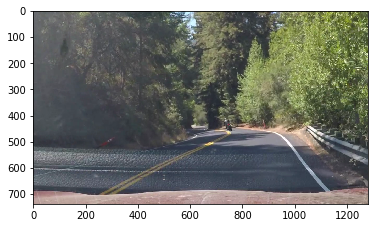

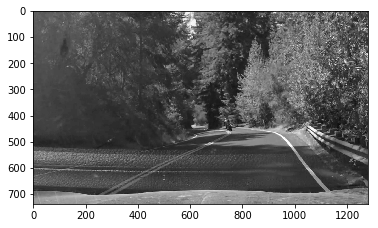

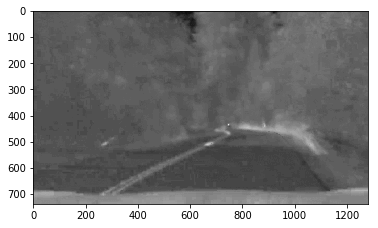

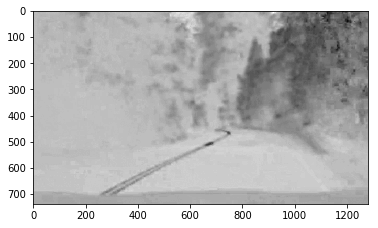

In [39]:
inputImage = cv2.imread('error_images/reflection_window.png')
inputImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB)
inputImage_g = cv2.cvtColor(inputImage, cv2.COLOR_RGB2YUV)

plt.figure()
plt.imshow(inputImage)
plt.figure()
plt.imshow(inputImage_g[:,:,0], cmap='gray')
plt.figure()
plt.imshow(inputImage_g[:,:,1], cmap='gray')
plt.figure()
plt.imshow(inputImage_g[:,:,2], cmap='gray')

### Line averaging

In [40]:
import cv2
import numpy as np

a = np.array([[1, 2], [4, 5], [7, 8], [10, 11], [10, 11], [10, 11], [10, 11], [10, 11]], dtype='float32')
h = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype='float32')
a = np.array([a])

pointsOut = cv2.perspectiveTransform(a, h)

print(a.shape, h.shape, pointsOut.shape)

(1, 8, 2) (3, 3) (1, 8, 2)


In [48]:
sanity_result_prev = [False, True, True, True]
all(sanity_result_prev)

False